# Results Analysis

## Imports

In [4]:
import os
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

## Definitions

In [5]:
RESULT_DIR  = '../results/'

In [6]:
RESULT_FILES = !find $RESULT_DIR -type f 

In [7]:
CLASSIC_METHODS = [
    'random_sampling',
    'margin_sampling',
    'training_utility_sampling',
    'density_weighted_sampling',
    'expected_error_reduction'
]

HARDNESS_MEASURES = [
    "borderline_points_sampling",
    "class_balance_sampling",
    "class_likelihood_sampling",
    "class_likeliood_diff_sampling",
    "disjunct_class_percentage_sampling",
    "disjunct_size_sampling",
    "f1_sampling",
    "f2_sampling",
    "f3_sampling",
    "f4_sampling",
    "harmfulness_sampling",
    "intra_extra_ratio_sampling",
    "k_disagreeing_neighbors_sampling",
    "local_set_cardinality_sampling",
    "ls_radius_sampling",
    "minority_value_sampling",
    "tree_depth_pruned_sampling",
    "tree_depth_unpruned_sampling",
    "usefulness_sampling"
]

In [8]:
def get_style(method):
    if method == 'random_sampling':
        return '*-'
    elif method in CLASSIC_METHODS:
        return '-'
    elif method in HARDNESS_MEASURES[:len(HARDNESS_MEASURES)//2]:
        return '+--'
    else:
        return '-.'

## Data Gathering

In [9]:
data = {
    os.path.splitext(os.path.basename(f))[0]: pd.read_csv(f, index_col=0).mean(axis='columns')
    for f in RESULT_FILES
}

In [10]:
index_columns = ['dataset', 'model', 'strategy']

df = pd.DataFrame(data).T.reset_index(names='file_name')

df[index_columns] = df.file_name.str.split('#', expand=True)

df = df.set_index(index_columns).drop(columns='file_name')


## Learning Curves

In [14]:
def plot_learning_curves(df, dataset, classifier):
    color_list = sns.color_palette('Paired', n_colors=len(df.columns))
    local_df = df.loc[(dataset, classifier)].T
    
    for i, column in enumerate(local_df.columns):
        # Aplica média móvel
        scores = local_df[column].rolling(window=5).mean()
        plt.plot(local_df.index + 1,
                 scores,
                 get_style(column),
                 color=color_list[i],
                 label=column )

    
    # Ordenação de legenda
    legend_handles_labels_sorted = sorted(zip(*plt.gca().get_legend_handles_labels()),
                                          key=lambda x: (not x[1] in CLASSIC_METHODS, x[1]))
    plt.legend(*zip(*legend_handles_labels_sorted), ncol=2)
    
    # Configuração da imagem
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.grid()
   
    # Titulo
    plt.title(dataset)

    

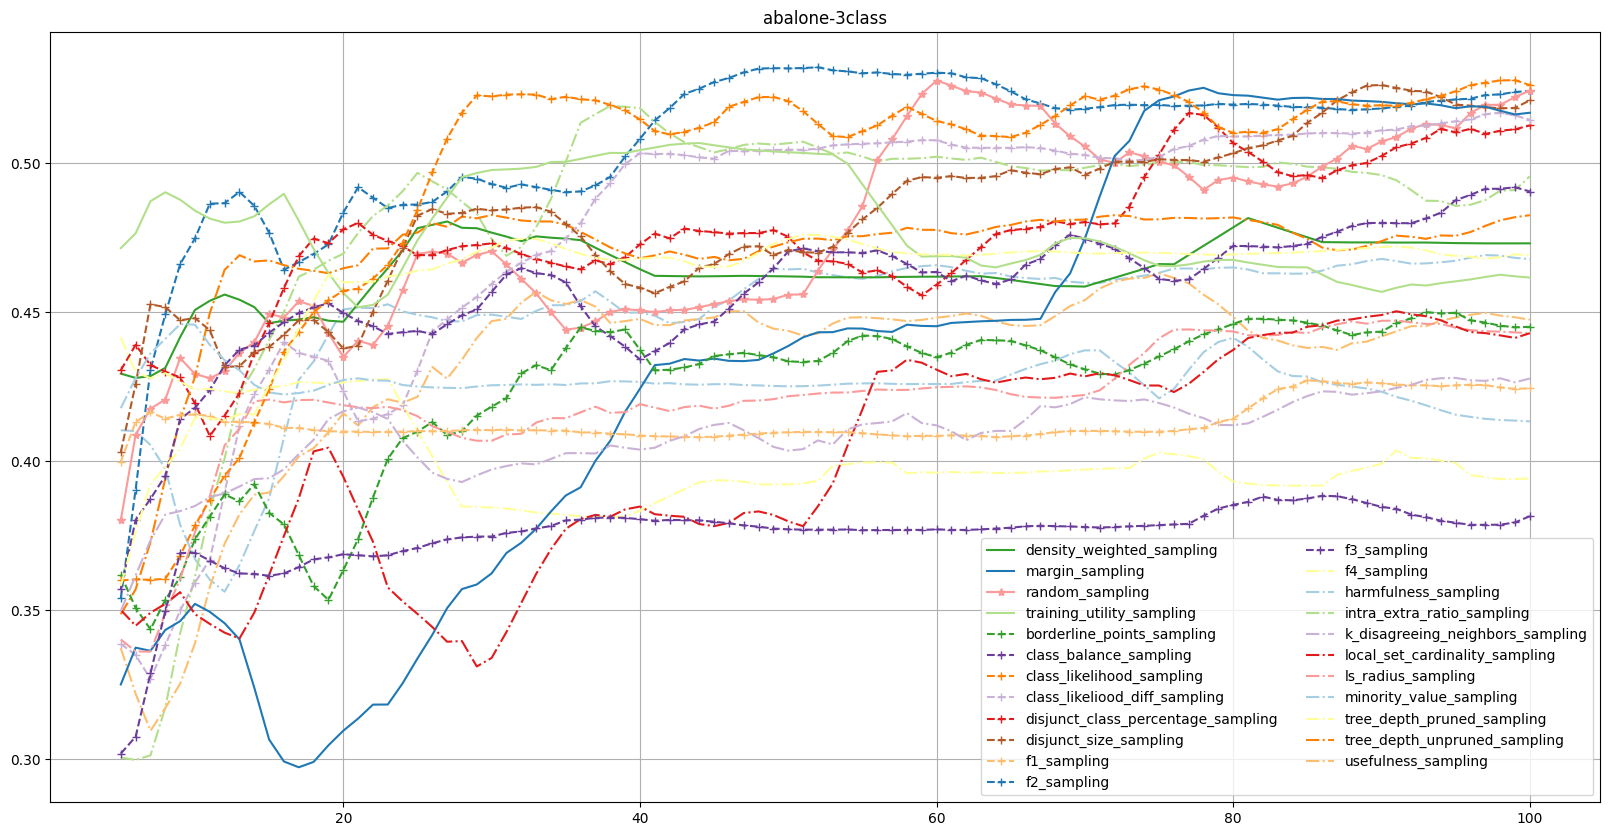

 q


In [15]:
for dataset in df.index.levels[0]:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', Warning)
        plot_learning_curves(df, dataset=str(dataset), classifier='SVC')    
    
    display(plt.gcf())
    if input() == 'q':
        break

    clear_output(wait=True)
    plt.close()
plt.close()

## Ranking Curves

In [53]:
datasets = df.index.levels[0]

df.droplevel(['dataset', 'model']).groupby('strategy').rank(ascending=True)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
strategy,,,,,,,,,,,,,,,,,,,,,
class_balance_sampling,9.0,10.0,10.0,13.0,13.0,13.0,13.0,13.0,12.0,12.0,...,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,16.0
density_weighted_sampling,16.0,12.0,22.0,22.0,22.0,24.0,25.0,24.0,24.0,23.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,20.0
class_likeliood_diff_sampling,20.0,12.0,11.0,12.0,10.0,10.0,19.0,11.0,20.0,16.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
harmfulness_sampling,10.0,12.0,8.0,13.0,9.0,8.0,7.0,7.0,6.0,6.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,7.0
density_weighted_sampling,26.0,25.0,21.0,21.0,20.0,20.0,20.0,18.0,18.0,18.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f3_sampling,15.0,16.0,16.0,14.0,14.0,12.0,14.0,12.0,14.0,13.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0
k_disagreeing_neighbors_sampling,17.0,20.0,19.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
harmfulness_sampling,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0


In [43]:
df_1.columns

Index(['harmfulness_sampling', 'f2_sampling', 'intra_extra_ratio_sampling',
       'density_weighted_sampling', 'random_sampling',
       'disjunct_class_percentage_sampling', 'usefulness_sampling',
       'tree_depth_unpruned_sampling', 'class_likeliood_diff_sampling',
       'f3_sampling', 'f4_sampling', 'disjunct_size_sampling',
       'minority_value_sampling', 'margin_sampling',
       'training_utility_sampling', 'borderline_points_sampling',
       'ls_radius_sampling', 'local_set_cardinality_sampling', 'f1_sampling',
       'class_likelihood_sampling', 'k_disagreeing_neighbors_sampling',
       'class_balance_sampling', 'tree_depth_pruned_sampling'],
      dtype='object', name='strategy')

In [31]:
df_1.columns

MultiIndex([('abalone-3class', 'SVC',               'harmfulness_sampling'),
            ('abalone-3class', 'SVC',                        'f2_sampling'),
            ('abalone-3class', 'SVC',         'intra_extra_ratio_sampling'),
            ('abalone-3class', 'SVC',          'density_weighted_sampling'),
            ('abalone-3class', 'SVC',                    'random_sampling'),
            ('abalone-3class', 'SVC', 'disjunct_class_percentage_sampling'),
            ('abalone-3class', 'SVC',                'usefulness_sampling'),
            ('abalone-3class', 'SVC',       'tree_depth_unpruned_sampling'),
            ('abalone-3class', 'SVC',      'class_likeliood_diff_sampling'),
            ('abalone-3class', 'SVC',                        'f3_sampling'),
            ('abalone-3class', 'SVC',                        'f4_sampling'),
            ('abalone-3class', 'SVC',             'disjunct_size_sampling'),
            ('abalone-3class', 'SVC',            'minority_value_sampling'),